In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import random
%matplotlib inline
from tick.hawkes import SimuHawkesExpKernels
from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelPowerLaw, HawkesConditionalLaw, HawkesKernel0
from tick.plot import plot_hawkes_kernels
import copy
import time

In [2]:
n_kernels = 6
baselines = np.ones(n_kernels)
cutoff = 1

alpha_itm, alpha_atm, alpha_otm, alpha_itm_atm, alpha_otm_atm = 0.48, 0.52, 0.14, 0.18, 0.13
gamma_itm, gamma_atm, gamma_otm, gamma_itm_atm, gamma_otm_atm = 0.08, 0.08, 0.08, 0.15, 0.15

def _beta(gamma):
    return (1 + gamma)

def HawkesKernelITM(a):
    return HawkesKernelPowerLaw(a*alpha_itm, cutoff, _beta(gamma_itm))

def HawkesKernelATM(a):
    return HawkesKernelPowerLaw(a*alpha_atm, cutoff, _beta(gamma_atm))

def HawkesKernelOTM(a):
    return HawkesKernelPowerLaw(a*alpha_otm, cutoff, _beta(gamma_otm))

def HawkesKernelITM_ATM(a):
    return HawkesKernelPowerLaw(a*alpha_itm_atm, cutoff, _beta(gamma_itm_atm))

def HawkesKernelOTM_ATM(a):
    return HawkesKernelPowerLaw(a*alpha_otm_atm, cutoff, _beta(gamma_otm_atm))

In [3]:
def ker(tab) :
    return np.matrix([
    [
        HawkesKernelITM(tab[0,0]), 
        HawkesKernelITM(tab[1,0]),
        HawkesKernelITM_ATM(tab[2,0]),
        HawkesKernelITM_ATM(tab[3,0]),
        HawkesKernel0(), 
        HawkesKernel0()
    ],
    [
        HawkesKernelITM(tab[0,1]), 
        HawkesKernelITM(tab[1,1]),
        HawkesKernelITM_ATM(tab[2,1]),
        HawkesKernelITM_ATM(tab[3,1]),
        HawkesKernel0(), 
        HawkesKernel0()
    ], 
    [
        HawkesKernelITM_ATM(tab[0,2]),
        HawkesKernelITM_ATM(tab[1,2]),
        HawkesKernelATM(tab[2,2]), 
        HawkesKernelATM(tab[3,2]),
        HawkesKernelOTM_ATM(tab[4,2]),
        HawkesKernelOTM_ATM(tab[5,2])
    ],
    [
        HawkesKernelITM_ATM(tab[0,3]),
        HawkesKernelITM_ATM(tab[1,3]),
        HawkesKernelATM(tab[2,3]), 
        HawkesKernelATM(tab[3,3]),
        HawkesKernelOTM_ATM(tab[4,3]),
        HawkesKernelOTM_ATM(tab[5,3])
    ], 
    [
        HawkesKernel0(), 
        HawkesKernel0(),
        HawkesKernelOTM_ATM(tab[2,4]),
        HawkesKernelOTM_ATM(tab[3,4]),
        HawkesKernelOTM(tab[4,4]), 
        HawkesKernelOTM(tab[5,5])
    ], 
    [
        HawkesKernel0(), 
        HawkesKernel0(),
        HawkesKernelOTM_ATM(tab[2,5]),
        HawkesKernelOTM_ATM(tab[3,5]),
        HawkesKernelOTM(tab[4,5]), 
        HawkesKernelOTM(tab[5,5])
    ]])

In [4]:
"""
Simulation of 3-dimensional hawkes process
==========================================
"""
def simulate_hawkes(tab,i) :
    haw = SimuHawkes(
        kernels=ker(tab), 
        baseline=baselines, seed=i, verbose=True, force_simulation = True)
    dt = .01
    haw.end_time = 7
    haw.track_intensity(dt)
    haw.simulate()
    return haw

In [5]:
HawkesKernelITM(1)

0.48*(1+t)^(-1.08)

In [23]:
s=455

hawkes = simulate_hawkes(np.ones((6,6)),s)

mat = np.ones((6,6))

mat[2,2] = 1.05                                               #scenario 1
#mat[0,2], mat[5,2], mat[0,3], mat[5,3] = 1.1, 1.1, 1.1, 1.1   #scenario 2
#mat[1,3], mat[5,3] = 1.2, 1.2                                 #scenario 3
#mat[1,2], mat[4,2], mat[1,3], mat[4,3] = 1.1, 1.1, 1.1, 1.1   #scenario 4



print(mat)
hawkes2 = simulate_hawkes(mat.T,s)


----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 5.61e+00 seconds.
[[1.  1.  1.1 1.1 1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.1 1.1 1.  1. ]]
----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 6.84e+00 seconds.


In [24]:
k1, k2, k3 = .98, 1, 1.02

sigmas = [len(hawkes.timestamps[i])-len(hawkes.timestamps[i+1]) for i in [0,2,4]]
sigmas2 = [len(hawkes2.timestamps[i])-len(hawkes2.timestamps[i+1]) for i in [0,2,4]]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


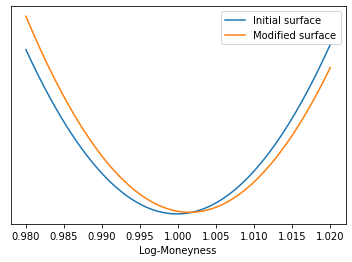

In [26]:
x = [k1, k2, k3]
xnew = np.linspace(k1, k3, 300) 

spl = UnivariateSpline(x, sigmas, k=2)
spl2 = UnivariateSpline(x, sigmas2, k=2)
plt.plot(xnew,spl(xnew),label='Initial surface')
plt.plot(xnew,spl2(xnew),label='Modified surface')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("Log-Moneyness")
plt.legend()